1/1 [==============================] - 0s 279ms/step


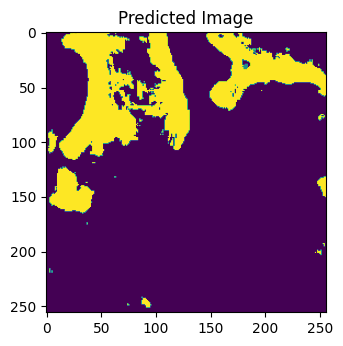

In [65]:
from PIL import Image  # Import the Image class from the PIL library
import numpy as np
from keras.models import load_model
from keras import backend as K
import matplotlib.pyplot as plt

img = "/content/image_part_001.jpg"

def function(im):
    def jaccard_coef(y_true, y_pred):
        y_true_flatten = K.flatten(y_true)
        y_pred_flatten = K.flatten(y_pred)
        intersection = K.sum(y_true_flatten * y_pred_flatten)
        final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
        return final_coef_value

    weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

    dice_loss = sm.losses.DiceLoss(class_weights=weights)
    focal_loss = sm.losses.CategoricalFocalLoss()
    total_loss = dice_loss + (1 * focal_loss)

    saved_model = load_model(
        "/content/Pb_CV.h5",
        custom_objects={'dice_loss_plus_1focal_loss': total_loss, 'jaccard_coef': jaccard_coef}
    )

    image = Image.open(im)
    image = image.resize((256, 256))
    image = np.array(image)
    image = np.expand_dims(image, 0)

    prediction = saved_model.predict(image)

    predicted_image = np.argmax(prediction, axis=3)
    predicted_image = predicted_image[0, :, :]

    plt.figure(figsize=(14, 8))
    plt.subplot(232)
    plt.title("Predicted Image")
    plt.imshow(predicted_image)

function(img)
